# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


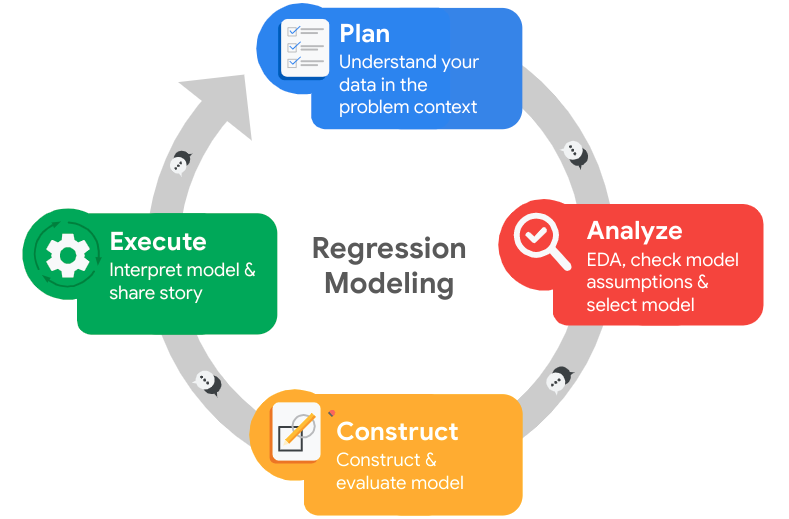

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [61]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [62]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [63]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [64]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [65]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [66]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [67]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [68]:
# Check for duplicates
df0.duplicated().sum()


3008

In [69]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [70]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

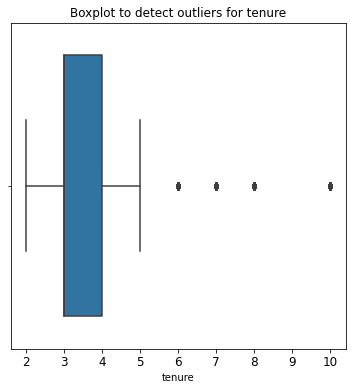

In [71]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])

plt.show()

In [72]:
# Determine the number of rows containing outliers
percentile_25th = df1['tenure'].quantile(0.25)
percentile_75th = df1['tenure'].quantile(0.75)
iqr = percentile_75th - percentile_25th

# Define the upper and lower bounds for non-outlier values in 'tenure'
upper_limit = percentile_75th + 1.5 * iqr
lower_limit = percentile_25th - 1.5 * iqr

# Print the bounds for clarity
print(f"Lower bound for outliers: {lower_limit}")
print(f"Upper bound for outliers: {upper_limit}")

# Identify the subset of data containing outliers in 'tenure'
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
num_outliers = len(outliers)
print(f"Number of rows with outliers in 'tenure': {num_outliers}")

Lower bound for outliers: 1.5
Upper bound for outliers: 5.5
Number of rows with outliers in 'tenure': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




In the analysis stage of exploratory data analysis (EDA), a comprehensive examination of variable relationships and data distributions is paramount. Observations often reveal intricate interdependencies between variables, which can illuminate underlying patterns or associations critical for model development. Analyzing these relationships allows for the identification of correlations, potential causal links, and multicollinearity issues. Distributions of data, including measures of central tendency and variability, provide insights into the inherent characteristics and potential anomalies within the dataset. The process of transforming data—such as normalization, scaling, or encoding categorical variables—is driven by the necessity to prepare the data for robust modeling. These transformations are chosen based on their ability to improve model performance and ensure the accuracy of predictions. EDA serves multiple purposes before constructing a predictive model; it not only facilitates a deeper understanding of the data but also informs feature selection, model choice, and parameter tuning. Resources commonly employed in this stage include academic papers, data visualization tools like Seaborn and Matplotlib, and statistical references. Ethical considerations are also crucial, as the analysis must be conducted with integrity, ensuring that the data is handled responsibly and that the findings are not manipulated to misrepresent the truth. Engaging in EDA with these reflections in mind fosters a more informed, ethical, and effective approach to model development.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [73]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

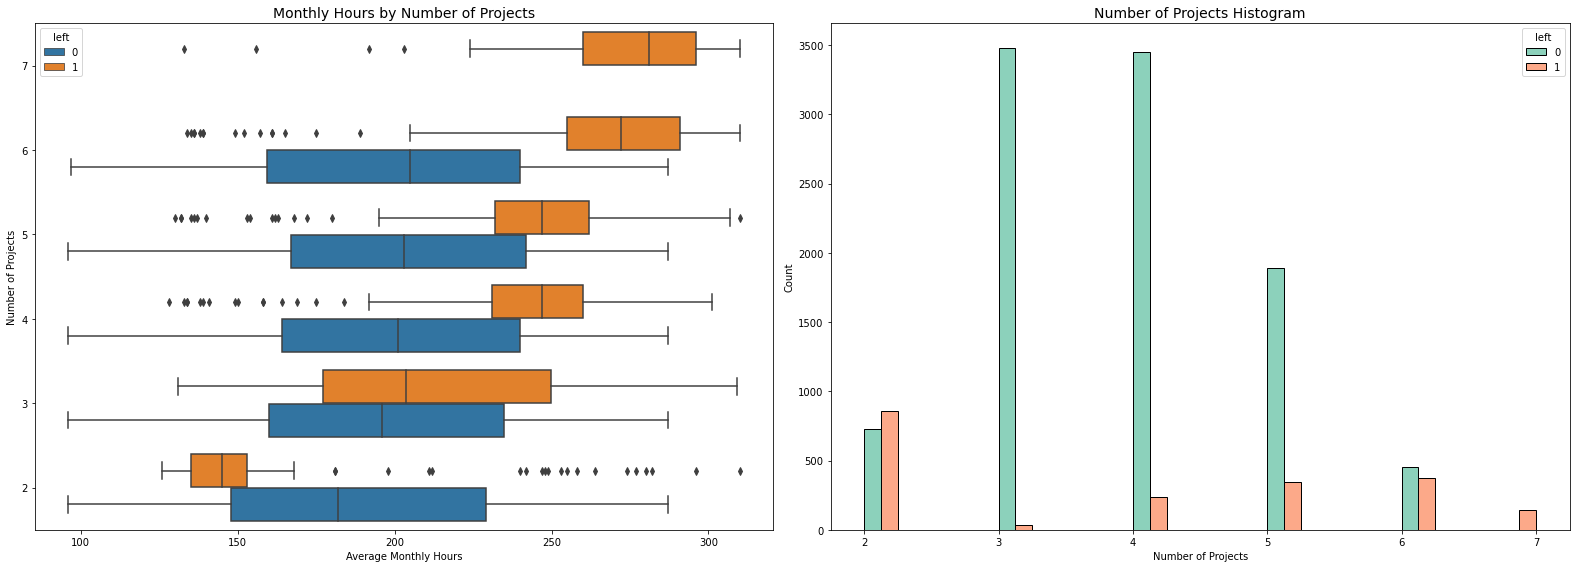

In [74]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Boxplot of monthly hours by number of projects
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly Hours by Number of Projects', fontsize=14)
ax[0].set_xlabel('Average Monthly Hours')
ax[0].set_ylabel('Number of Projects')

# Histogram of number of projects
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', ax=ax[1], palette='Set2', bins=20)
ax[1].set_title('Number of Projects Histogram', fontsize=14)
ax[1].set_xlabel('Number of Projects')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


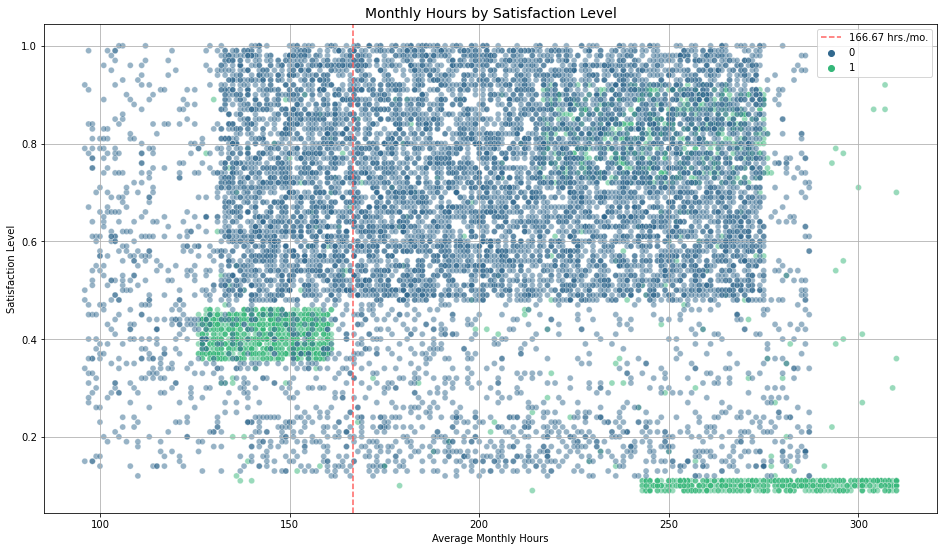

In [75]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5, palette='viridis')
plt.axvline(x=166.67, color='#ff6361', linestyle='--', label='166.67 hrs./mo.')
plt.title('Monthly Hours by Satisfaction Level', fontsize=14)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.legend()
plt.grid(True)
plt.show()

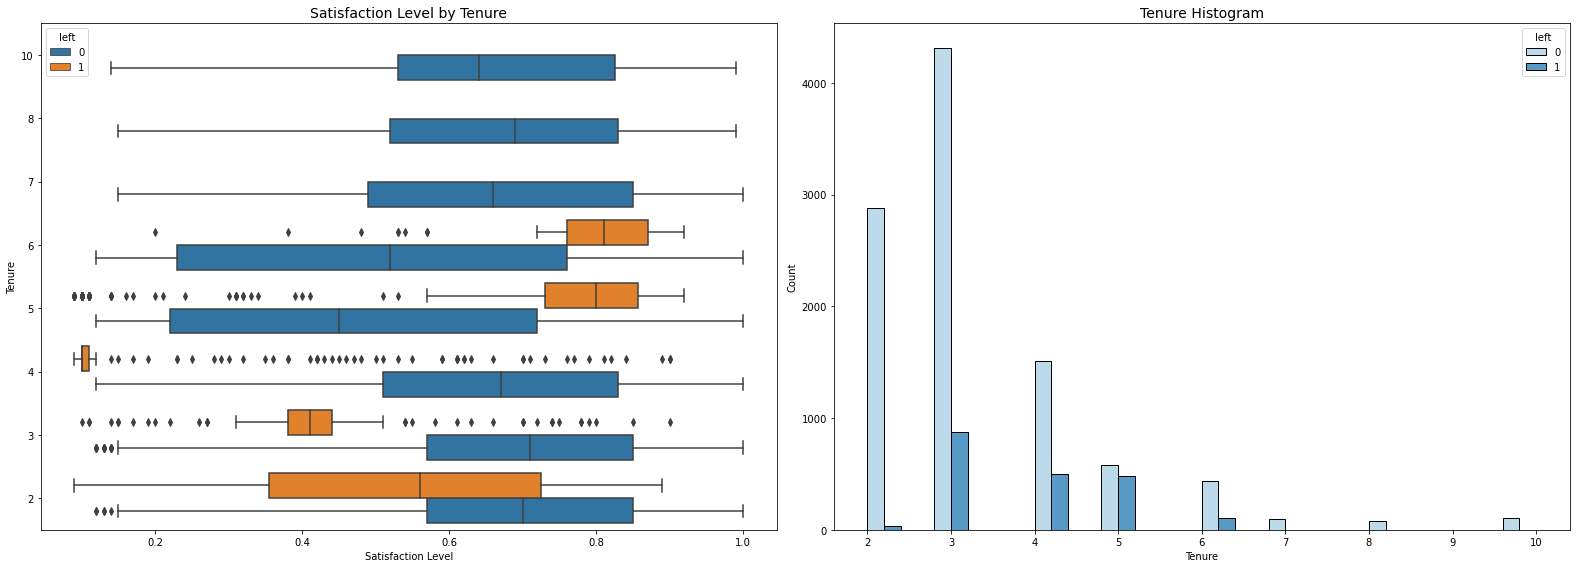

In [76]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Boxplot of satisfaction by tenure
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction Level by Tenure', fontsize=14)
ax[0].set_xlabel('Satisfaction Level')
ax[0].set_ylabel('Tenure')

# Histogram of tenure
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', ax=ax[1], palette='Paired', bins=20)
ax[1].set_title('Tenure Histogram', fontsize=14)
ax[1].set_xlabel('Tenure')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

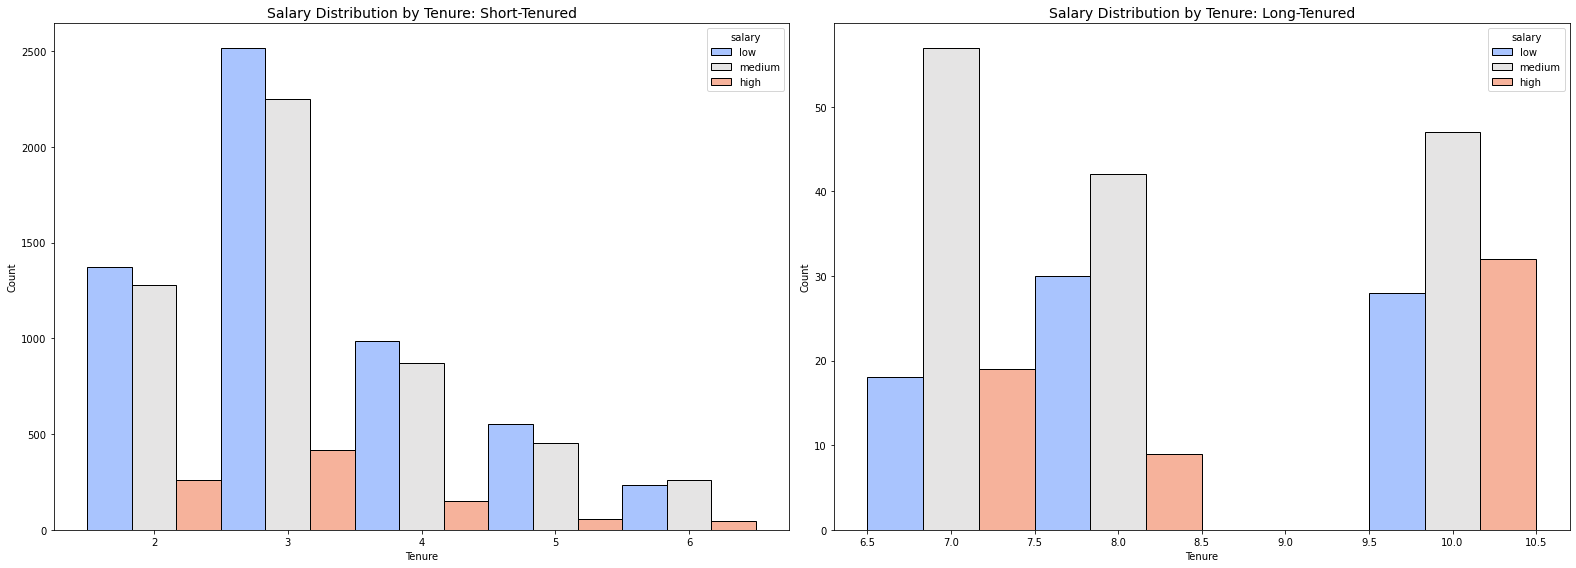

In [77]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Histogram of salary by tenure for short-tenured people
sns.histplot(data=df1[df1['tenure'] < 7], x='tenure', hue='salary', discrete=True, hue_order=['low', 'medium', 'high'], multiple='dodge', ax=ax[0], palette='coolwarm', bins=20)
ax[0].set_title('Salary Distribution by Tenure: Short-Tenured', fontsize=14)
ax[0].set_xlabel('Tenure')
ax[0].set_ylabel('Count')

# Histogram of salary by tenure for long-tenured people
sns.histplot(data=df1[df1['tenure'] > 6], x='tenure', hue='salary', discrete=True, hue_order=['low', 'medium', 'high'], multiple='dodge', ax=ax[1], palette='coolwarm', bins=20)
ax[1].set_title('Salary Distribution by Tenure: Long-Tenured', fontsize=14)
ax[1].set_xlabel('Tenure')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

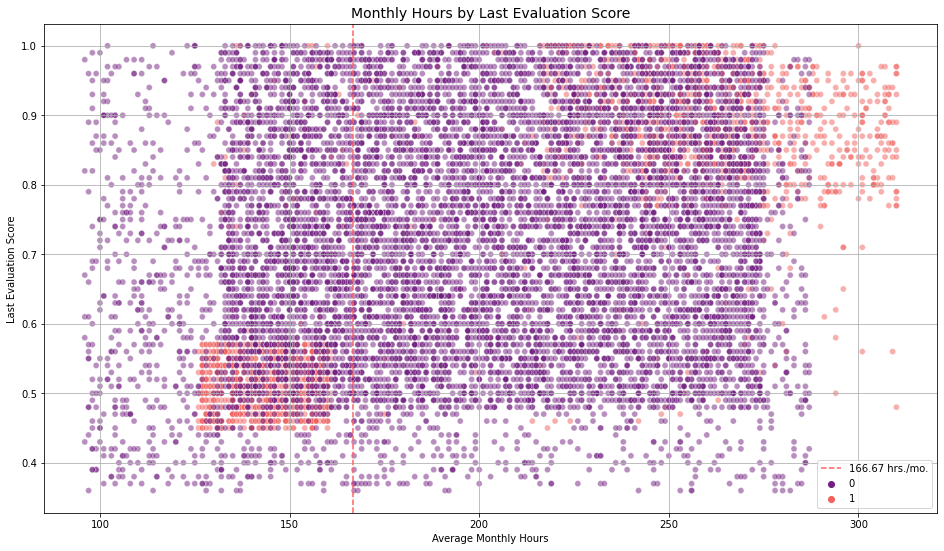

In [78]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5, palette='magma')
plt.axvline(x=166.67, color='#ff6361', linestyle='--', label='166.67 hrs./mo.')
plt.title('Monthly Hours by Last Evaluation Score', fontsize=14)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation Score')
plt.legend()
plt.grid(True)
plt.show()

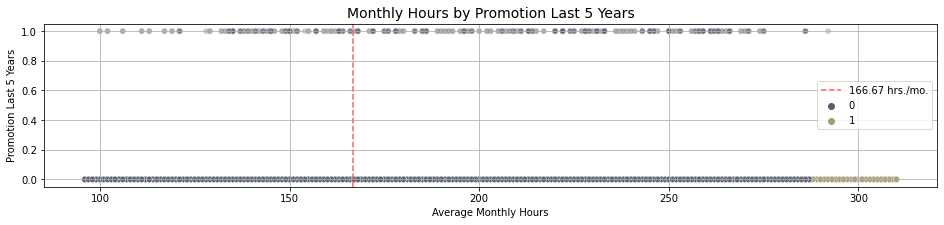

In [79]:
# Create a plot as needed
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5, palette='cividis')
plt.axvline(x=166.67, color='#ff6361', linestyle='--', label='166.67 hrs./mo.')
plt.title('Monthly Hours by Promotion Last 5 Years', fontsize=14)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Promotion Last 5 Years')
plt.legend()
plt.grid(True)
plt.show()

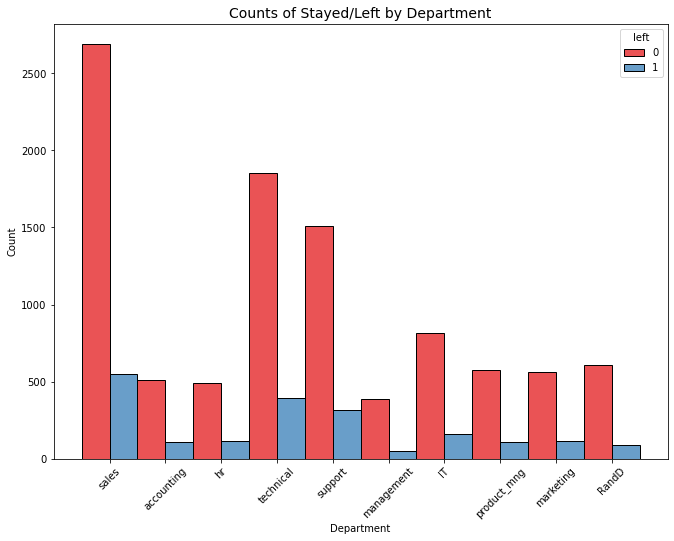

In [80]:
# Create a plot as needed
plt.figure(figsize=(11, 8))
sns.histplot(data=df1, x='department', hue='left', discrete=True, hue_order=[0, 1], multiple='dodge', palette='Set1')
plt.xticks(rotation=45)
plt.title('Counts of Stayed/Left by Department', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

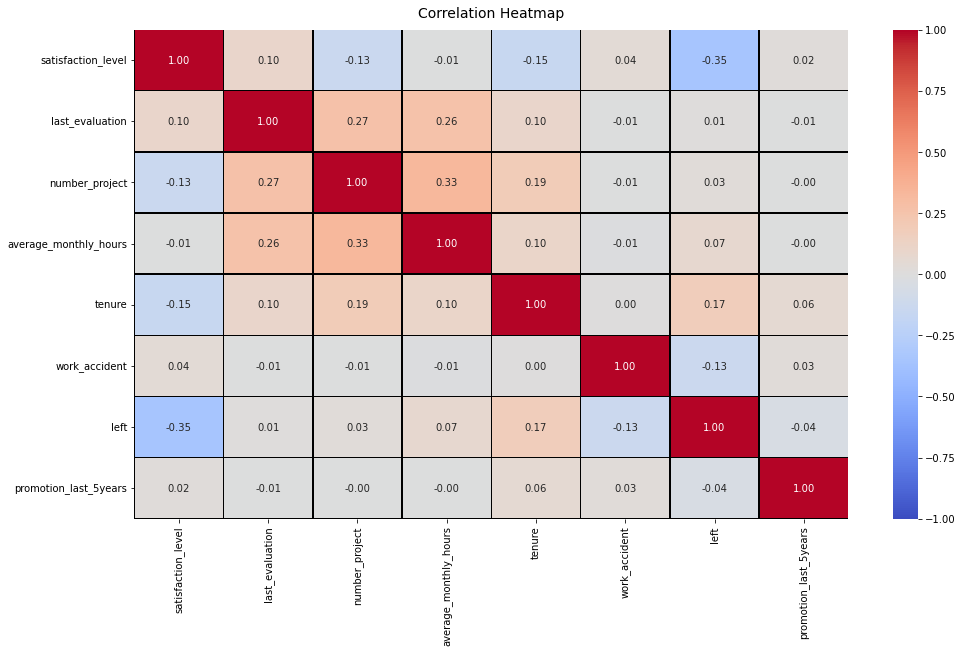

In [81]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', center=0, linewidths=0.5, linecolor='black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



In the Construct Stage of model development, it is imperative to methodically evaluate the appropriateness of models, construct them with precision, validate their assumptions, and rigorously assess their fit to the data. Initially, one must judiciously select models based on the nature of the outcome variable and the characteristics of the data. For instance, in the context of logistic regression, it is essential to ensure that the outcome variable is categorical, as this model is specifically designed for such cases. The independence of observations is a critical assumption, as the presence of autocorrelation or dependency could undermine the validity of the model’s estimates. Furthermore, assessing multicollinearity among predictor variables is crucial, as severe multicollinearity can lead to unreliable coefficient estimates and inflated standard errors, thereby complicating the interpretation of the model. Extreme outliers must also be scrutinized, as they can disproportionately influence the model's performance and lead to misleading conclusions. The linearity assumption, which posits a linear relationship between each predictor variable and the logit of the outcome variable, must be evaluated through diagnostic plots or statistical tests to ensure its validity. Additionally, a sufficiently large sample size is required to achieve stable and generalizable estimates, as small sample sizes can lead to overfitting and unreliable inference.

Reflecting on the construction process involves addressing several critical questions. Anomalies or deviations from expected patterns should be carefully investigated, as they may indicate underlying issues with the model or data. The selection of independent variables should be justified based on theoretical considerations, empirical evidence, and their relevance to the research question. Ensuring that all model assumptions are met is fundamental to the robustness of the model; violations should be addressed through appropriate remedial measures or alternative modeling approaches. The model's fit to the data should be assessed using a range of statistical metrics and validation techniques to determine its predictive accuracy and generalizability. Continuous improvement of the model may be necessary, involving iterative refinements based on diagnostic feedback and performance evaluations. Resources utilized during this stage, including academic literature, statistical software documentation, and online forums, should be meticulously documented with appropriate references. Ethical considerations must also be contemplated, particularly regarding the treatment of data and the potential implications of model results on stakeholders, ensuring that the model's application adheres to ethical standards and contributes to informed decision-making.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The objective is to predict whether an employee leaves the company, which is a binary categorical outcome variable. Thus, this task is a binary classification problem, where the outcome variable ("left") can either be 1 (indicating the employee left) or 0 (indicating the employee did not leave).

### Identify the types of models most appropriate for this task.

Given the categorical nature of the outcome variable, suitable models include:
+ Logistic Regression: Ideal for binary classification tasks, as it estimates the probability of the outcome.
+ Tree-based Models (e.g., Decision Trees, Random Forests, Gradient Boosting Machines): These models can capture complex interactions between features and handle non-linear relationships.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [82]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

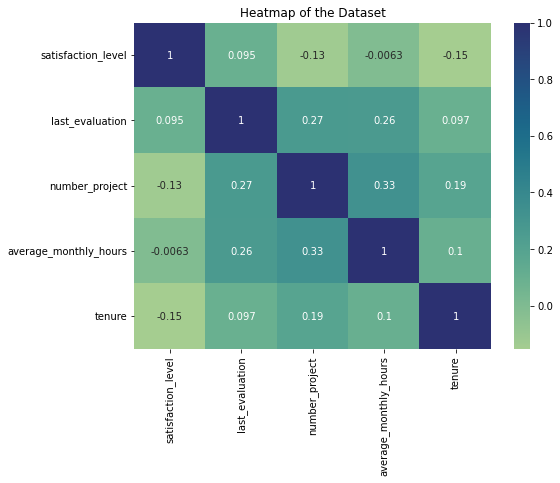

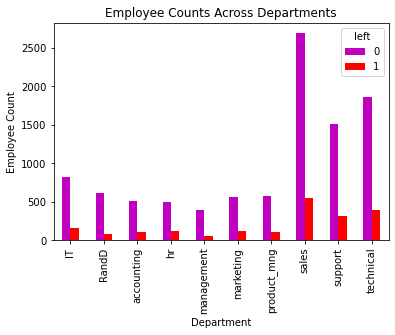

In [83]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the Dataset')
plt.show()

pd.crosstab(df1['department'], df1['left']).plot(kind='bar', color='mr')
plt.title('Employee Counts Across Departments')
plt.ylabel('Employee Count')
plt.xlabel('Department')
plt.show()

In [84]:
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

In [85]:
# Isolate the outcome variable
y = df_logreg['left']

# Select the features for the model
X = df_logreg.drop('left', axis=1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

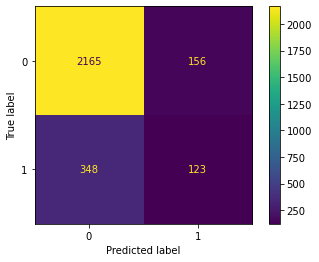

In [87]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
log_disp.plot(values_format='')
plt.show()

In [88]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



In [89]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The logistic regression model demonstrates a commendable performance on the test set, achieving a precision of 80%, recall of 83%, an F1-score of 80% (all metrics are weighted averages), and an accuracy of 83%. These metrics suggest a robust ability of the model to correctly classify the target variable, with a balanced trade-off between precision and recall, reflected in the F1-score.

### Conclusion, Recommendations, Next Steps

The analysis, corroborated by the feature importances derived from the logistic regression model, indicates a significant concern regarding employee overwork within the company. This finding necessitates immediate and strategic recommendations to mitigate the risk of employee dissatisfaction and turnover. To enhance employee retention, it is advisable to implement measures such as capping the number of concurrent projects assigned to employees, and considering promotions for those with a tenure of at least four years or conducting a deeper investigation into the causes of dissatisfaction among this group. Additionally, the company should evaluate its policies on overtime and ensure that employees are adequately informed about overtime pay and workload expectations. There is also a need for transparent communication regarding workload and time off policies to avoid ambiguity. Engaging in comprehensive discussions about the company’s work culture, both broadly and within specific teams, could provide valuable insights into employee satisfaction. Furthermore, the evaluation metrics for employee performance should not disproportionately favor those who work excessive hours, but rather adopt a proportional scale that acknowledges varying levels of contribution and effort.

In terms of future directions, it is prudent to address potential concerns regarding data leakage. Specifically, assessing the impact on predictions when excluding the 'last_evaluation' feature could clarify whether this feature is essential for accurate retention predictions or if it merely reflects existing evaluation practices. Investigating the role of the evaluation score in determining employee retention, and possibly pivoting to predict performance scores or satisfaction levels, may offer additional insights. Moreover, as an extension of this analysis, applying K-means clustering to the dataset could uncover meaningful patterns and segments within the employee population, potentially revealing further actionable insights.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.